<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Timeseries filtering</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"></p>
</div>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import scipy.signal as signal_

In [22]:
# Generate signal with random noise
srate = 1_000 # sampling rate
time = np.arange(10*srate)/srate
nPoints = len(time)

signal = np.random.randn(nPoints) * 5
# Add 50 Hz line noise
signal += np.sin(2*np.pi*50*time)

In [41]:
def plotSignal(signal):
    fig,ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(time, signal)
    ax[0].set_xlabel('Time [s]')
    ax[0].set_title('Time domain signal')
    ax[0].set_xlim([time[0], time[-1]])
    
    frequencyDomain = np.abs(fftpack.fft(signal/nPoints))
    hz = np.linspace(0, srate/2, int(nPoints/2) + 1)
    ax[1].plot(hz, frequencyDomain[:len(hz)])
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].set_title('Frequency domain signal')
    ax[1].set_xlim([0, 150])
    ax[1].set_ylim([0, .5])
    
    plt.show()

def plotTwoSignals(signal1, signal2):
    fig,ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(time, signal1, label='Original')
    ax[0].plot(time, signal2, label='Filtered')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_title('Time domain signal')
    ax[0].set_xlim([1, 1.2])
    ax[0].legend()
    
    frequencyDomain1 = np.abs(fftpack.fft(signal1/nPoints))
    frequencyDomain2 = np.abs(fftpack.fft(signal2/nPoints))
    hz = np.linspace(0, srate/2, int(nPoints/2) + 1)
    ax[1].plot(hz, frequencyDomain1[:len(hz)], label='Original')
    ax[1].plot(hz, frequencyDomain2[:len(hz)], label='Filtered')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].set_title('Frequency domain signal')
    ax[1].set_xlim([0, 150])
    ax[1].set_ylim([0, .5])
    ax[1].legend()
    
    plt.show()

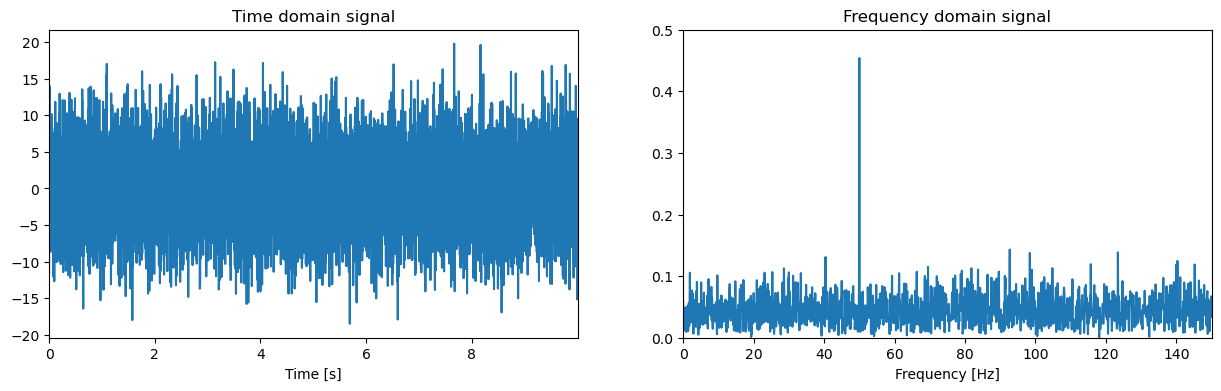

In [35]:
plotSignal(signal)

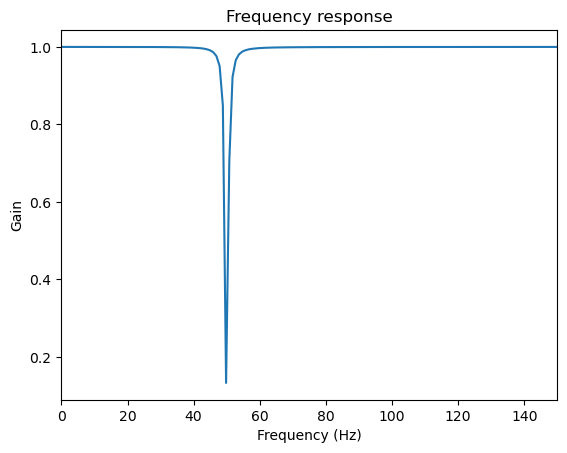

In [30]:
# We will use an IIR notch filter to notch out the 50 Hz line noise

f = 50 # Frequency to notch out
q = 50 # Quality of the filter

# the notch filter
b,a = signal_.iirnotch(f,q,srate)

# evaluate the filter
freq,h = signal_.freqz(b,a,fs=srate)

plt.plot(freq, np.abs(h)**2)
plt.title('Frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim((0, 150))
plt.show()

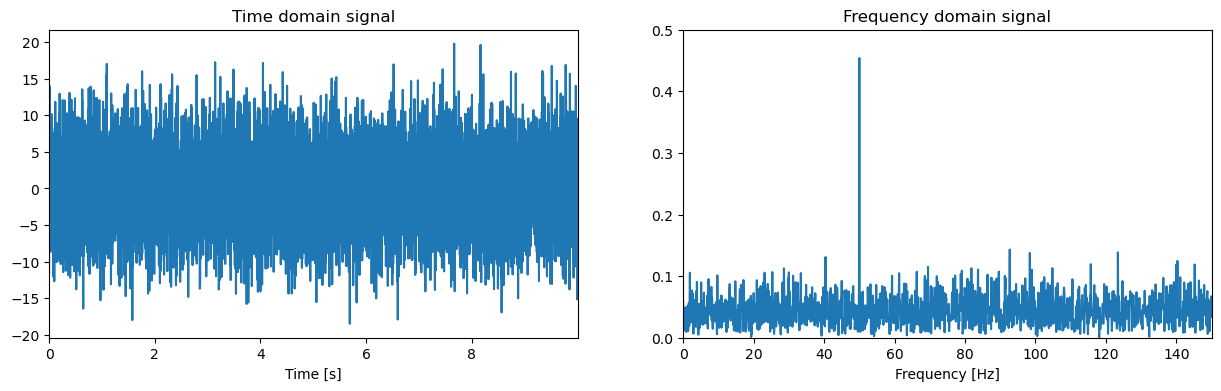

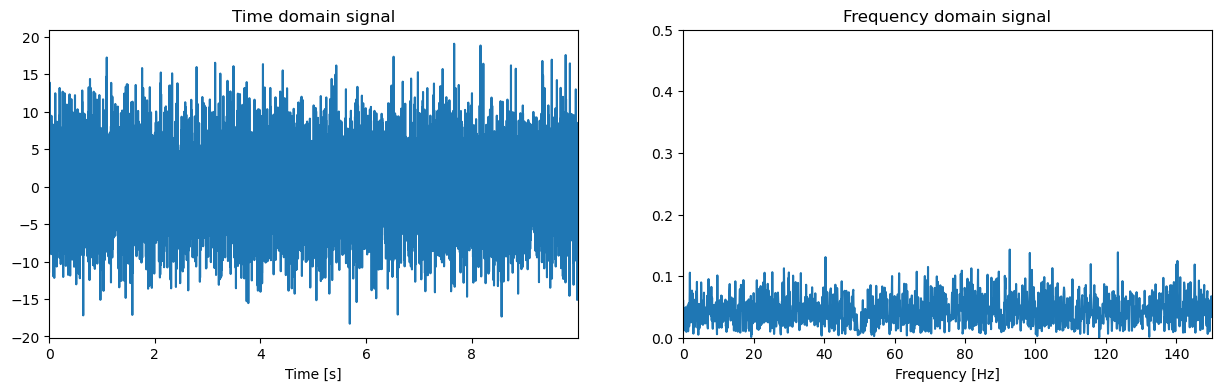

In [44]:
notched = signal_.filtfilt(b,a,signal)

plotSignal(signal)
plotSignal(notched)

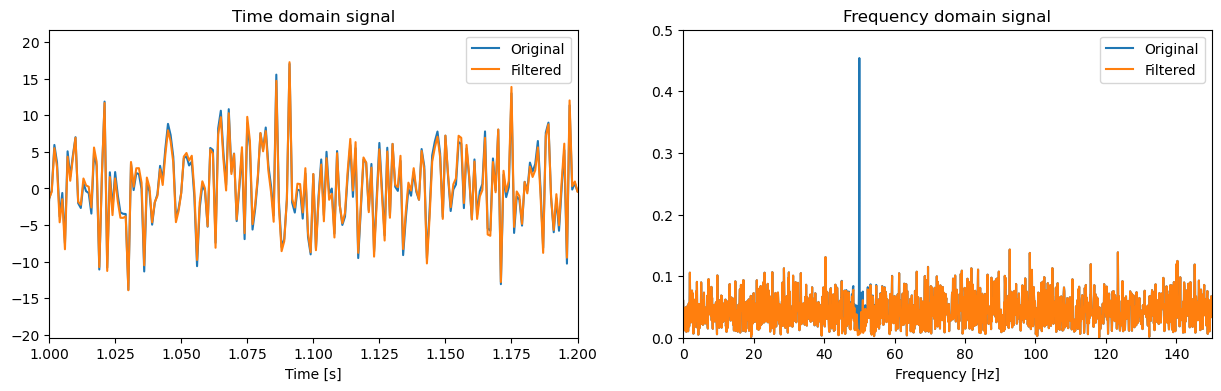

In [45]:
plotTwoSignals(signal, notched)

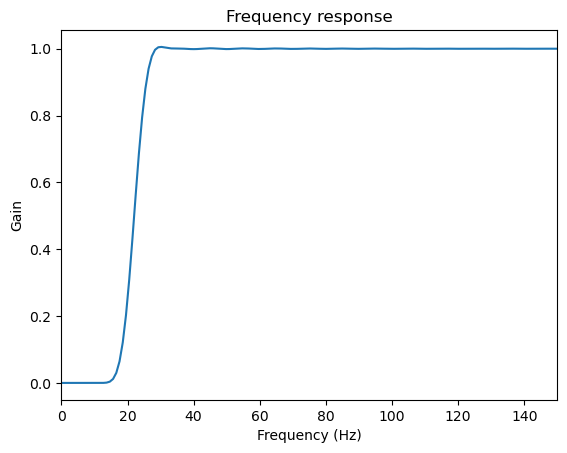

In [50]:
# High-pass FIR filter
lowEdge = 20 # Hz
fkern = signal_.firwin(lowEdge*10 + 1, lowEdge, fs=srate, pass_zero=False)
freq,h = signal_.freqz(fkern,1,fs=srate)

plt.plot(freq, np.abs(h)**2)
plt.title('Frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim((0, 150))
plt.show()

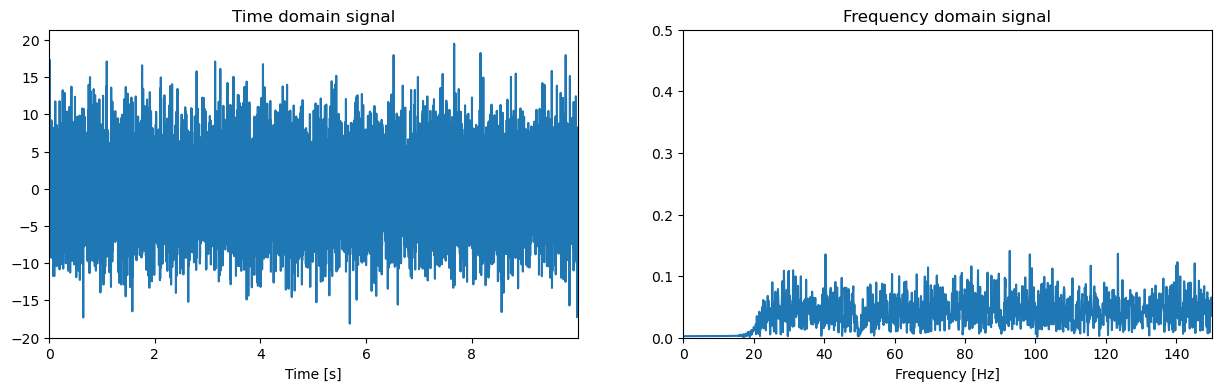

In [54]:
highpass = signal_.filtfilt(fkern, 1, notched)
plotSignal(highpass)


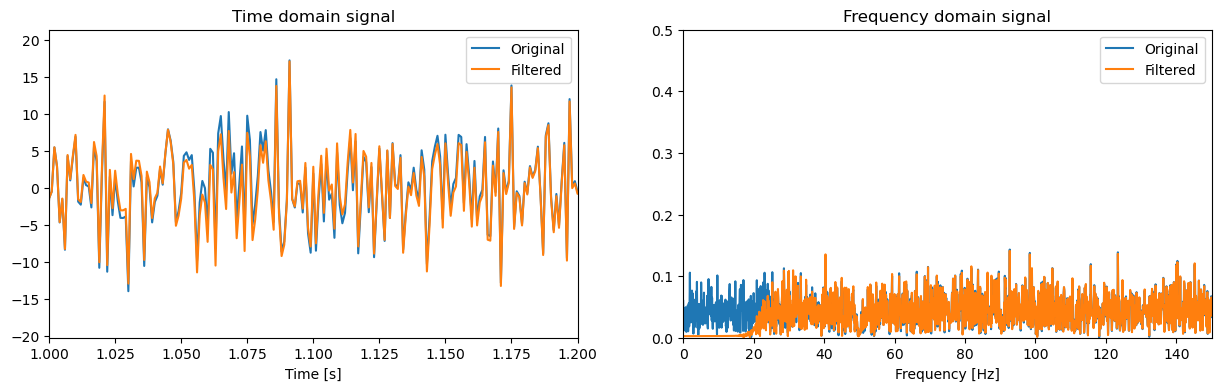

In [55]:
plotTwoSignals(notched, highpass)

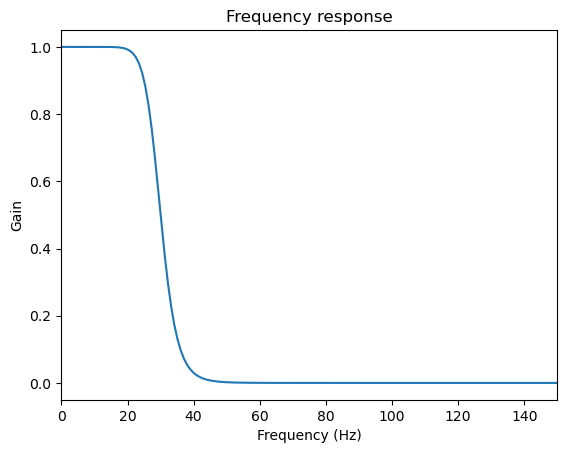

In [57]:
# Low-pass IIR (Butterworth) filter
lowCutoff = 30
b,a = signal_.butter(6, lowCutoff/(srate/2))

freq,h = signal_.freqz(b,a,fs=srate)

plt.plot(freq, np.abs(h)**2)
plt.title('Frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim((0, 150))
plt.show()

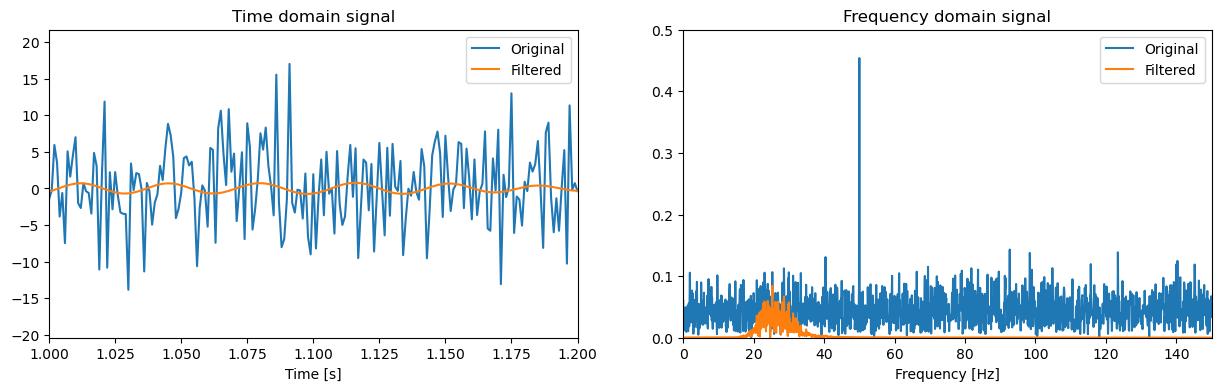

In [58]:
bandpass = signal_.filtfilt(b, a, highpass)
plotTwoSignals(signal, bandpass)